In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get data

In [5]:
#get data
data_bench = pd.read_pickle("data/course_and_uni_1819.pkl")
data_covid = pd.read_pickle("data/course_and_uni_2122.pkl")

#drop not needed columns - no point in keeping uni and course as we don't have future data (duh)
data_bench.drop(["uni","course"],inplace = True, axis = "columns")
data_covid.drop(["uni","course"], inplace = True, axis = "columns")

data_bench

,Q01,Q02,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0.807250,0.68250,0.51025,0.50355,0.651650,0.658200,0.654250,0.52195,0.600400,0.444250,...,0.612150,0.53395,0.643250,0.59545,0.75470,0.65185,0.617850,0.429400,0.368450,0.50085
1,0.944450,0.90835,1.00000,0.83890,0.811100,0.858350,0.972200,0.66945,0.500000,0.366650,...,0.888900,0.98610,0.986100,0.91665,0.97220,0.82500,0.671450,0.444450,0.830550,0.87500
2,0.928550,0.92955,0.95275,0.96110,0.911000,0.939750,0.942550,0.65515,0.658750,0.782150,...,0.527250,0.65605,0.859050,0.94995,0.96110,0.92215,0.880350,0.880350,0.815900,0.92120
3,0.980925,0.88655,0.87435,0.82560,0.858525,0.915825,0.826375,0.84610,0.755275,0.670325,...,0.939425,0.90250,0.909075,0.74730,0.85045,0.86130,0.748725,0.685475,0.556975,0.92330
4,0.956200,0.91390,0.92010,0.85765,0.931550,0.912400,0.899300,0.82725,0.815500,0.821600,...,0.937450,0.91200,0.924250,0.74590,0.95465,0.93755,0.873950,0.790100,0.580100,0.91370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.947150,0.89300,0.90020,0.78180,0.876150,0.885600,0.711200,0.78450,0.827650,0.718750,...,0.770800,0.76715,0.791650,0.50600,0.56215,0.89870,0.767650,0.600800,0.345350,0.90125
1494,1.000000,1.00000,1.00000,1.00000,0.988100,1.000000,0.913950,0.94050,1.000000,0.878200,...,0.913950,1.00000,0.975000,0.82310,0.75910,0.97620,0.964300,0.842500,0.543200,0.96430
1495,0.896850,0.91665,0.89685,0.89285,0.924600,0.892850,0.816650,0.86905,0.817450,0.789650,...,0.920650,0.84920,0.849200,0.61505,0.60555,0.97220,0.797600,0.619050,0.555600,0.89285
1496,0.855250,0.85455,0.90405,0.83660,0.906550,0.874050,0.746350,0.82460,0.795150,0.756650,...,0.784750,0.77125,0.744000,0.52205,0.58090,0.85455,0.741700,0.481300,0.398550,0.85170


# Benchmark 

#### Pearson correlation

<AxesSubplot: >

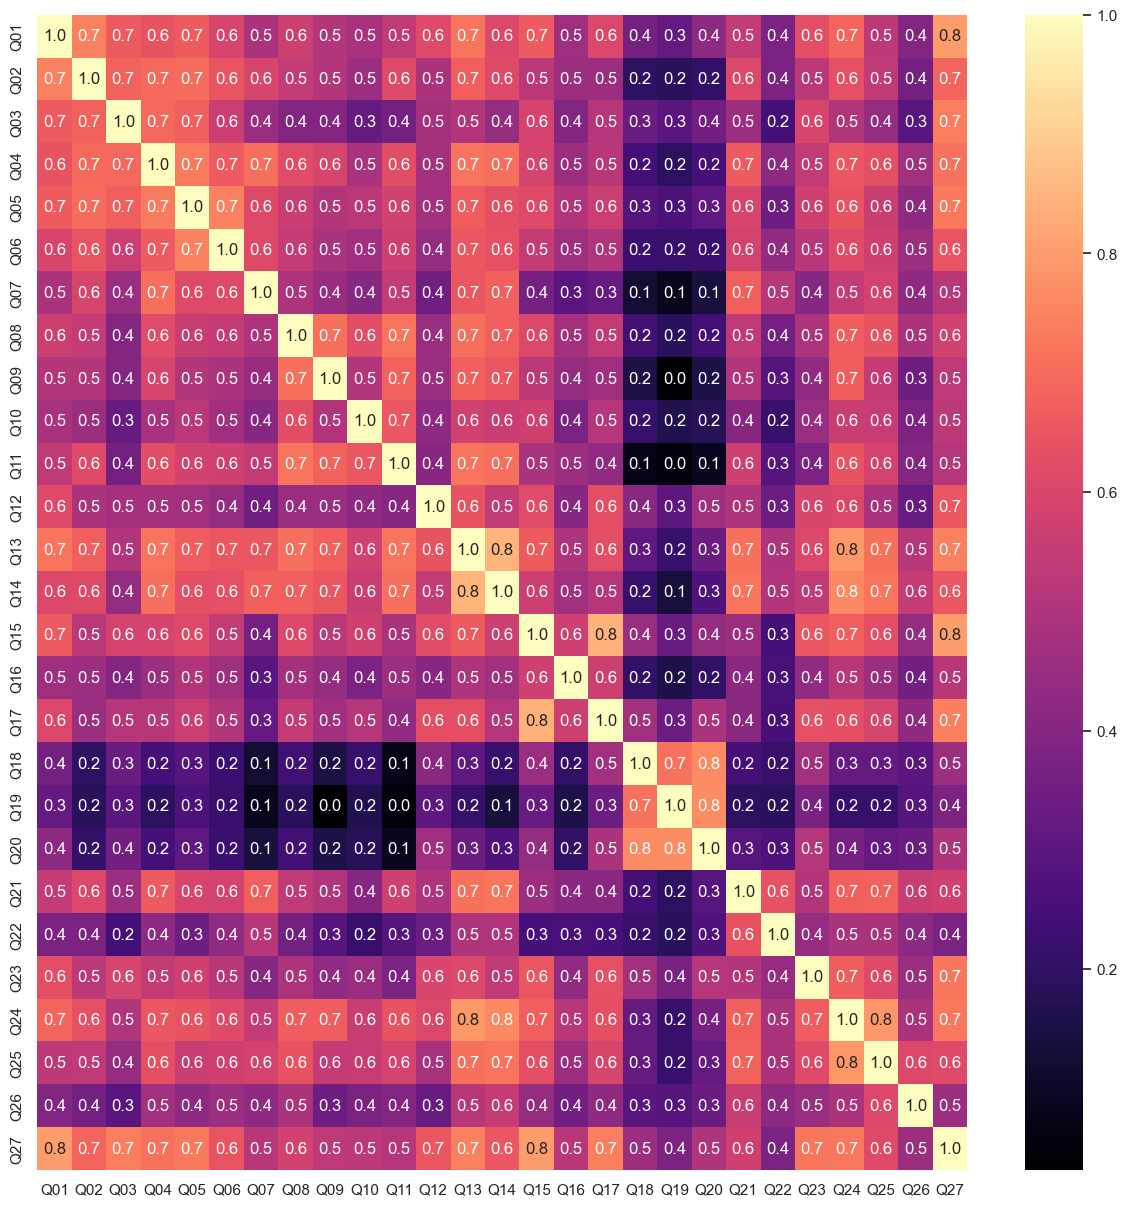

In [6]:
pearson_corr_bench = data_bench.corr(method="pearson")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(pearson_corr_bench, cmap = "magma", annot=True, fmt = ".1f")

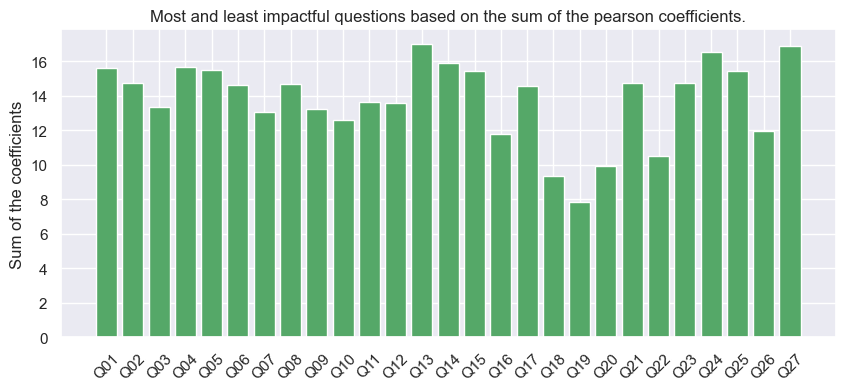

In [7]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), pearson_corr_bench.sum(), color= "g")
plt.xticks(np.arange(1,28), pearson_corr_bench.columns, rotation = 45)
plt.title("Most and least impactful questions based on the sum of the pearson coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [8]:
pearson_corr27_bench = pearson_corr_bench["Q27"].sort_values(ascending = False)
pearson_corr27_bench

Q27    1.000000
Q15    0.802607
Q01    0.801950
Q13    0.746362
Q17    0.742736
Q03    0.736297
Q05    0.730824
Q24    0.725915
Q23    0.723237
Q04    0.713637
Q02    0.684510
Q12    0.653148
Q14    0.649037
Q06    0.645332
Q25    0.614466
Q08    0.580589
Q21    0.575660
Q09    0.532412
Q10    0.528690
Q07    0.522845
Q16    0.520845
Q11    0.513190
Q20    0.497768
Q18    0.457900
Q26    0.455686
Q19    0.381206
Q22    0.377186
Name: Q27, dtype: float64

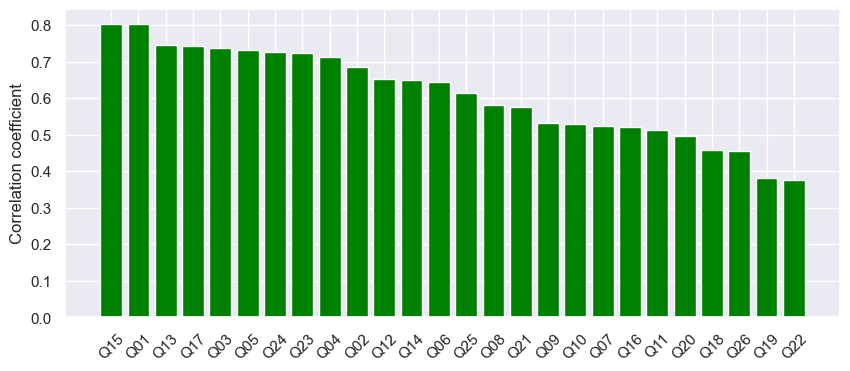

In [9]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), pearson_corr27_bench[1:], color = "green")
plt.xticks(np.arange(1,27), pearson_corr27_bench.index[1:], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()

#### Spearman correlation

<AxesSubplot: >

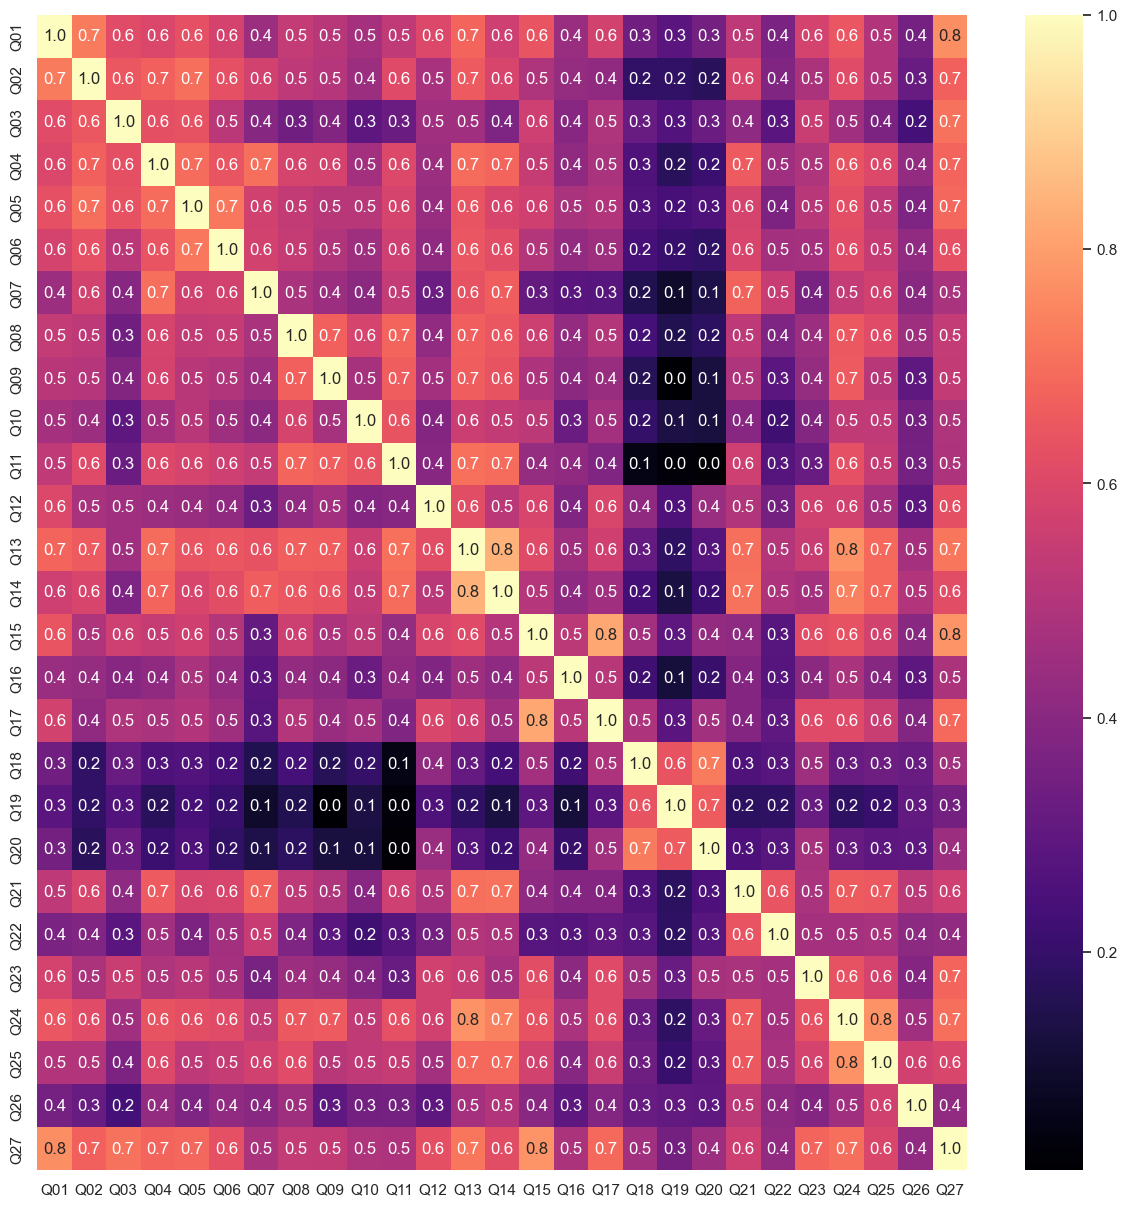

In [10]:
spearman_corr_bench = data_bench.corr(method="spearman")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(spearman_corr_bench, cmap = "magma", annot=True, fmt = ".1f")

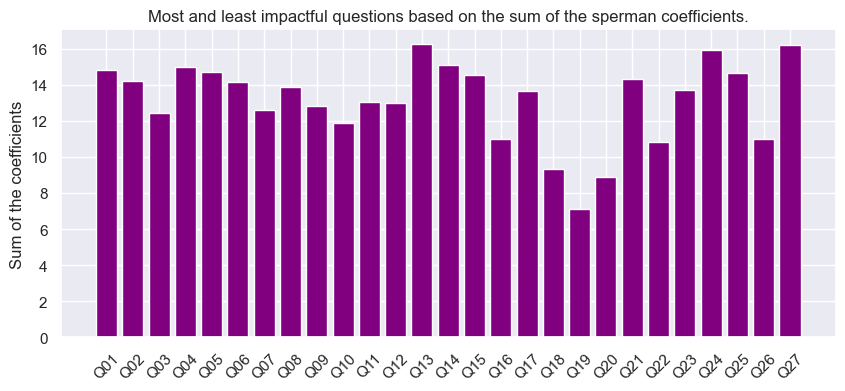

In [11]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), spearman_corr_bench.sum(), color= "purple")
plt.xticks(np.arange(1,28), spearman_corr_bench.columns, rotation = 45)
plt.title("Most and least impactful questions based on the sum of the sperman coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [12]:
spearman_corr27_bench = spearman_corr_bench["Q27"].sort_values(ascending = False)
spearman_corr27_bench

Q27    1.000000
Q15    0.777356
Q01    0.768004
Q13    0.715232
Q03    0.710560
Q24    0.700507
Q17    0.690379
Q05    0.687999
Q04    0.680752
Q23    0.679699
Q02    0.672190
Q06    0.627516
Q12    0.626381
Q14    0.615079
Q25    0.592103
Q21    0.561832
Q08    0.540619
Q09    0.534569
Q10    0.489750
Q11    0.486122
Q16    0.483657
Q07    0.479840
Q18    0.460473
Q20    0.443209
Q22    0.419842
Q26    0.419711
Q19    0.347136
Name: Q27, dtype: float64

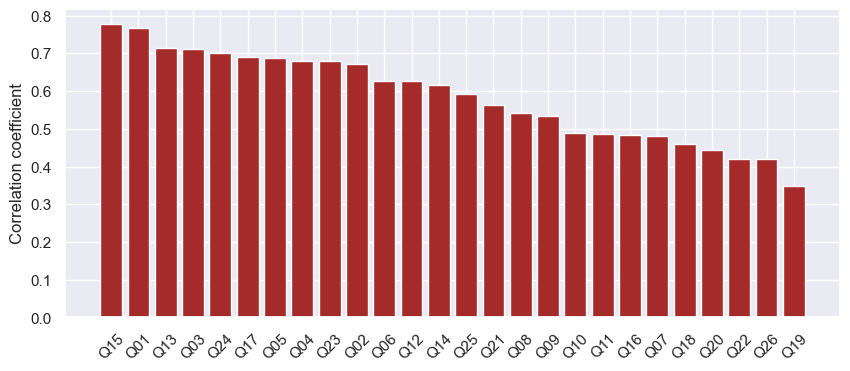

In [29]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), spearman_corr27_bench[1:], color = "brown")
plt.xticks(np.arange(1,27), spearman_corr27_bench.index[1:], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()

# Covid 

#### Pearson correlation

<AxesSubplot: >

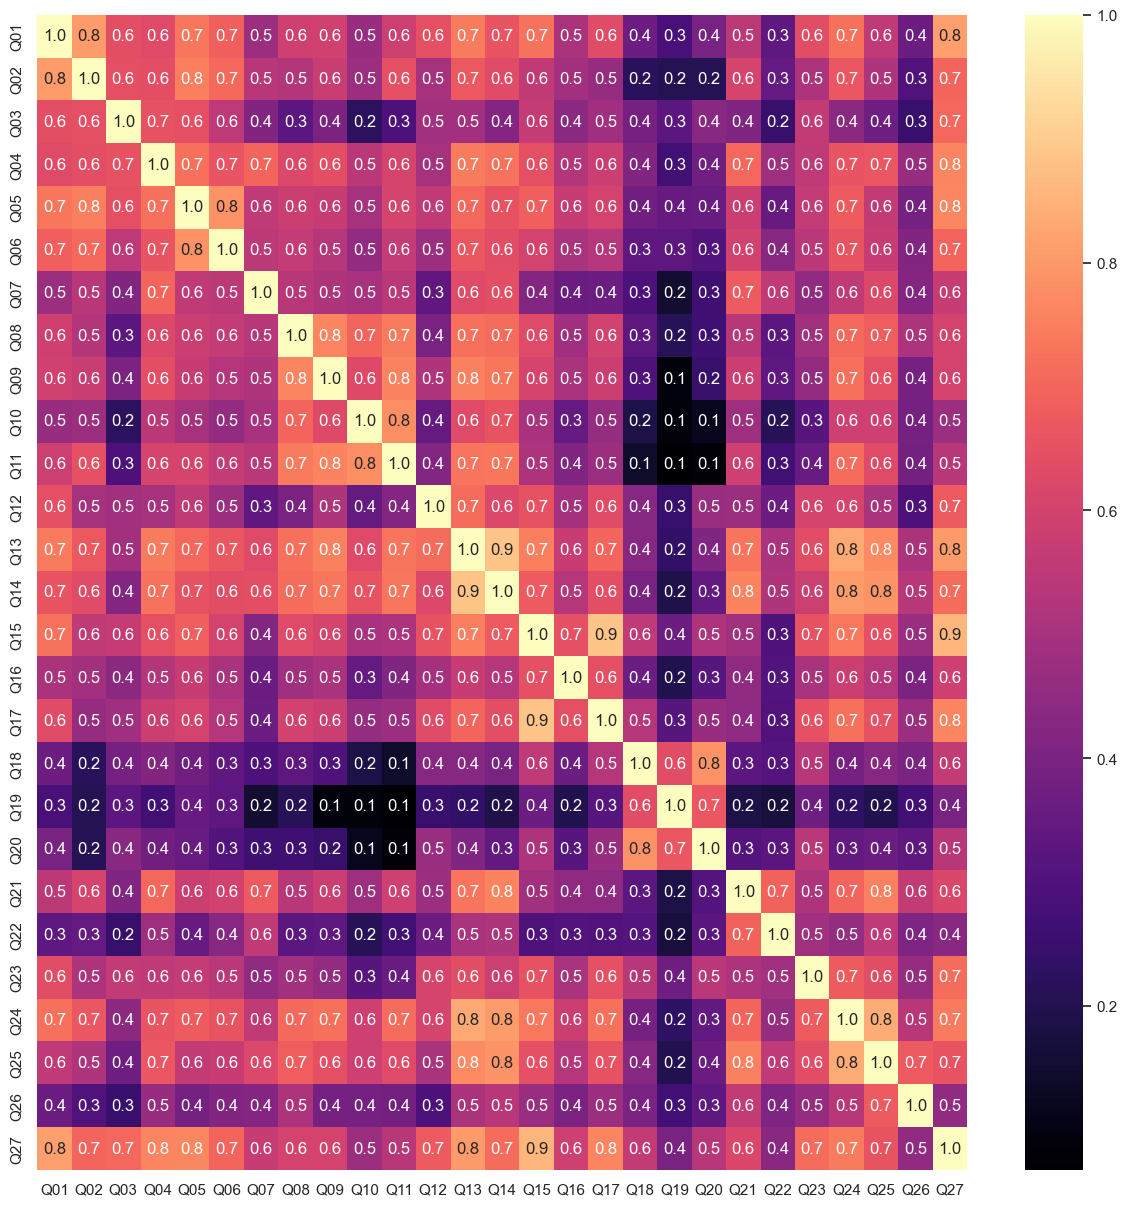

In [14]:
pearson_corr_covid = data_covid.corr(method="pearson")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(pearson_corr_covid, cmap = "magma", annot=True, fmt=".1f")

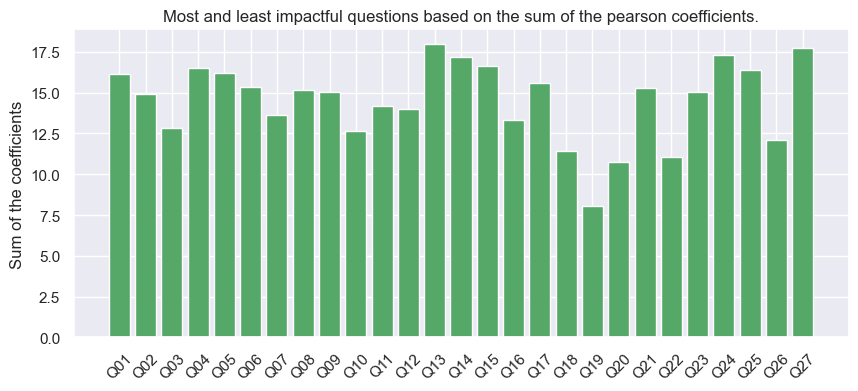

In [15]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), pearson_corr_covid.sum(), color= "g")
plt.xticks(np.arange(1,28), pearson_corr_covid.columns, rotation = 45)
plt.title("Most and least impactful questions based on the sum of the pearson coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [16]:
pearson_corr27_covid = pearson_corr_covid["Q27"].sort_values(ascending = False)
pearson_corr27_covid

Q27    1.000000
Q15    0.855508
Q01    0.811826
Q13    0.800795
Q05    0.765211
Q17    0.761104
Q04    0.760150
Q24    0.744482
Q23    0.712853
Q14    0.712116
Q03    0.704149
Q06    0.698082
Q02    0.695573
Q12    0.675297
Q25    0.654748
Q21    0.620015
Q09    0.603003
Q08    0.600298
Q16    0.588350
Q07    0.571848
Q18    0.561288
Q20    0.539254
Q11    0.536573
Q10    0.472123
Q26    0.452117
Q22    0.433206
Q19    0.394649
Name: Q27, dtype: float64

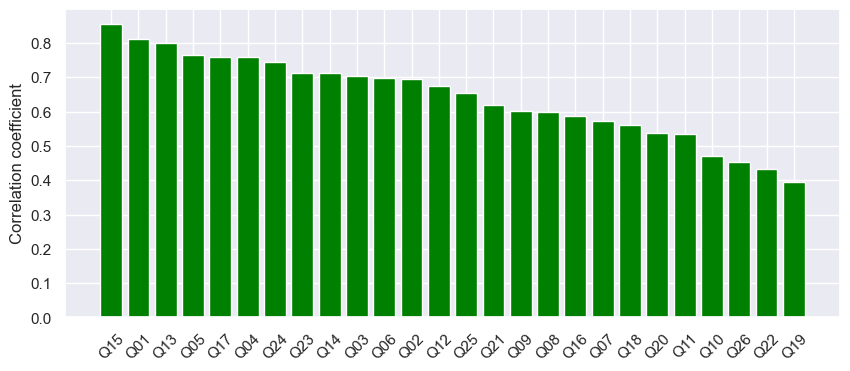

In [30]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), pearson_corr27_covid[1:], color = "green")
plt.xticks(np.arange(1,27), pearson_corr27_covid.index[1:], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()

#### Spearman correlation

<AxesSubplot: >

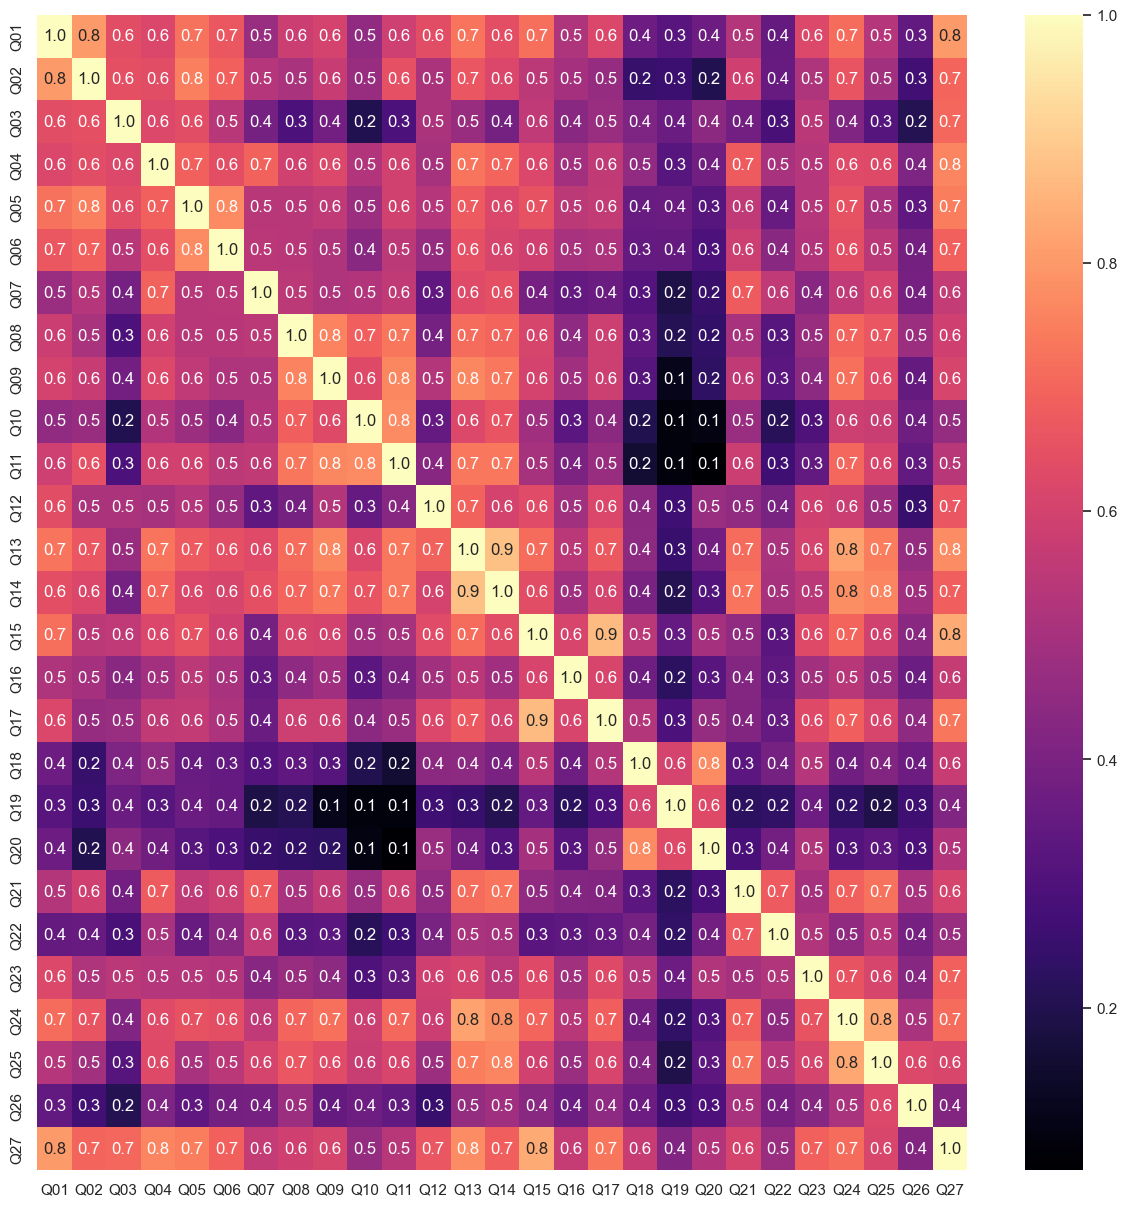

In [18]:
spearman_corr_covid = data_covid.corr(method="spearman")

sns.set(rc={'figure.figsize':(15, 15)})
sns.heatmap(spearman_corr_covid, cmap = "magma", annot=True, fmt=".1f")

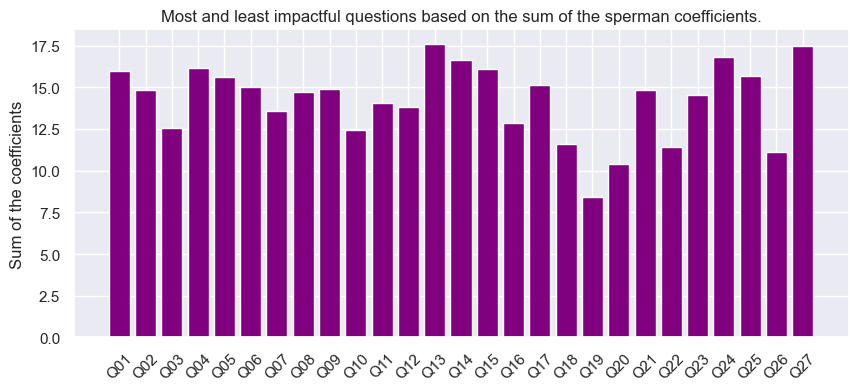

In [19]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,28), spearman_corr_covid.sum(), color= "purple")
plt.xticks(np.arange(1,28), spearman_corr_covid.columns, rotation = 45)
plt.title("Most and least impactful questions based on the sum of the sperman coefficients.")
plt.ylabel("Sum of the coefficients")
plt.show()

In [20]:
spearman_corr27_covid = spearman_corr_covid["Q27"].sort_values(ascending = False)
spearman_corr27_covid

Q27    1.000000
Q15    0.835187
Q01    0.802567
Q13    0.778144
Q04    0.760427
Q05    0.747111
Q17    0.733633
Q24    0.716193
Q03    0.702062
Q02    0.698873
Q23    0.690539
Q06    0.688356
Q14    0.684578
Q12    0.663285
Q25    0.617634
Q09    0.607984
Q21    0.605294
Q08    0.591972
Q18    0.573611
Q16    0.569661
Q07    0.564641
Q11    0.535550
Q20    0.524158
Q22    0.469963
Q10    0.460098
Q26    0.418152
Q19    0.412887
Name: Q27, dtype: float64

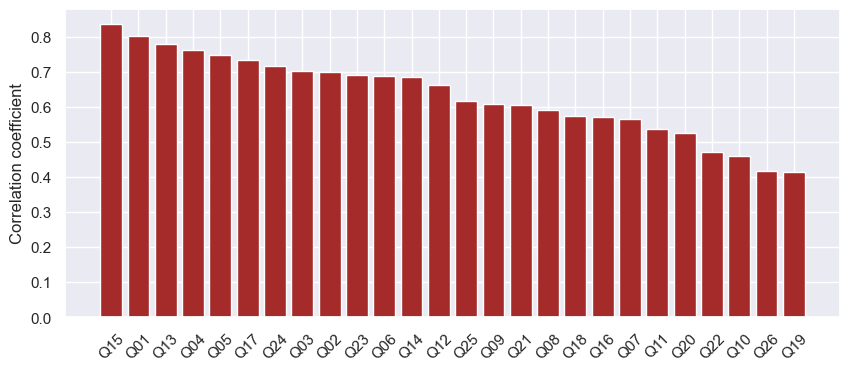

In [24]:
plt.figure(figsize=(10, 4))
plt.bar(np.arange(1,27), spearman_corr27_covid[1:], color = "brown")
plt.xticks(np.arange(1,27), spearman_corr27_covid.index[1:], rotation = 45)
plt.ylabel("Correlation coefficient")
plt.show()